In [12]:
# Base Module of data processing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [14]:
# Set path
path_mac = "../../data/"
file_path = path_mac + "Iris_Data.csv"
# Get data
data=pd.read_csv(file_path, sep=',')

In [15]:
# Split data & y_data
x_data = data.drop(data.columns[len(data.columns)-1], axis=1)
y_data = data["species"].map({'Iris-setosa':0, "Iris-versicolor":1, "Iris-virginica":2})

In [16]:
#model = DecisionTreeClassifier()
forest = RandomForestClassifier(n_estimators=4, random_state=7, max_leaf_nodes=3)

In [17]:
# Split as train data and test data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [18]:
# Train
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=3,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [19]:
# Test
prediction = forest.predict(x_test)

F-Score: 1.0
Accuracy:  1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45



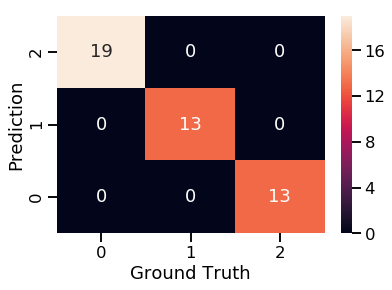

In [20]:
# Check Result
p,r,f,s = precision_recall_fscore_support(y_test, prediction, average='micro')
print("F-Score:", round(f,3))
print("Accuracy: ", accuracy_score(y_test, prediction))

print(classification_report(y_test, prediction))

labels = sorted(y_test.unique())
chart = pd.DataFrame(confusion_matrix(y_test, prediction),
                  columns=labels, index=labels)
sns.set_context('talk')
ax = sns.heatmap(chart, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1])
ax.set_ylabel('Prediction')
ax.set_xlabel('Ground Truth');

In [21]:
print("Prediction in training data: {:.3f}".format(forest.score(x_train, y_train)))
print("Prediction in test data: {:.3f}".format(forest.score(x_test, y_test)))

Prediction in training data: 0.943
Prediction in test data: 1.000
